# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Installing and importing Web Scraping libraries

In [2]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

# Inputting the URL

In [3]:
url= 'https://wuzzuf.net/search/jobs/?a=navb1%7Cspb1&q=illustrator'

# Create a Client-based Request to Get the URL

In [4]:
client = urlopen(url)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no">\n    <meta http-equiv="expires" content="Thu Dec 08 2022 18:30:44 GMT+0200" />\n\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="cache-control" content="no-cache, no-store, must-revalidate">\n\n    <title data-react-helmet="true">Job Search | WUZZUF</title>\n\n<meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="description" content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services."/><meta data-react-helmet="true" name="keywords" content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, 
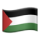
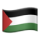

In [5]:
#Getting the HTML Code of the Full Page

html = client.read()

html

In [6]:
#Closing the Request

client.close()

# Creating an HTML Parser Using BeautifulSou

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<meta content="Thu Dec 08 2022 18:30:44 GMT+0200" http-equiv="expires">
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in
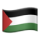
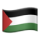

In [7]:
soup = bs (html, "html.parser")

soup

# Creating a Container for the Needed Data

In [8]:
containers = soup.find_all("div",{"class": "css-1gatmva e1v1l3u10"})

len(containers)

15

In [9]:
bs.prettify(containers[0])

'<div class="css-1gatmva e1v1l3u10">\n <style data-emotion="css pkv5jc">\n  .css-pkv5jc{position:relative;min-height:60px;}\n </style>\n <div class="css-pkv5jc">\n  <a rel="noreferrer" target="_blank">\n   <style data-emotion="css 17095x3">\n    .css-17095x3{position:absolute;right:0;top:0;width:60px;height:60px;object-fit:contain;object-position:center center;}\n   </style>\n  </a>\n  <style data-emotion="css laomuu">\n   .css-laomuu{padding-right:60px;}\n  </style>\n  <div class="css-laomuu">\n   <style data-emotion="css m604qf">\n    .css-m604qf{font-size:16px;font-weight:600;font-style:normal;letter-spacing:-0.4px;line-height:24px;color:#0055D9;margin:0;}\n   </style>\n   <h2 class="css-m604qf">\n    <style data-emotion="css o171kl">\n     .css-o171kl{-webkit-text-decoration:none;text-decoration:none;color:inherit;}\n    </style>\n    <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/iuLXuoozSYlz-2D-illustrator-Designer-Cairo-Egypt" rel="noreferrer" target="_blank">\n     2D il

# Accessing Page Elements

In [10]:
containers[0].div.h2.text

'2D illustrator / Designer'

In [11]:
jtitle = containers[0].div.h2.text

jtitle

'2D illustrator / Designer'

In [12]:
#best way
jtitle = containers[0].findAll("h2",{"class": "css-m604qf"})

jtitle[0].text

'2D illustrator / Designer'

# Bringing it All Together

In [13]:
f= open('wuzzef.csv','w')
header = 'job_title, company_name, job_type'

In [14]:
for container in containers:

        jtitle = container.findAll("h2",{"class": "css-m604qf"})
        job_title = jtitle[0].text.strip()
        
        cname = container.findAll("a",{"class": "css-17s97q8"})
        company_name = cname[0].text.strip()
        
        jtype = container.findAll("div", {"class": "css-1lh32fc"})
        job_type=jtype[0].text.strip()

 #       print(job_title)
  #      print(company_name)
   #     print(job_type)
    #    print()  
       # print(job_title +','+ company_name +','+ job_type +'/n')
       # print()
        f.write(job_title +","+ company_name +"," + job_type + "\n")

f.close()